In [13]:
from scipy.stats import binom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n=5 #Total number of students
k=3 # Number of students who like python
p=0.66 # probability that a student likes python

In [3]:
#Calculate binomial distribution
probability=binom.pmf(k,n,p)

In [4]:
print(f"The probability that exactly {k} out of {n} students like Python is {probability:.4f}")

The probability that exactly 3 out of 5 students like Python is 0.3323


In [7]:
#calculate the probability that 2 out of 7 students prefer online learning over in-person classes when in general 55% of students prefer online learning
n=7
k=2
p=0.55 

probability=binom.pmf(k,n,p)
print(f"The probability that exactly {k} out of {n} students like Python is {probability:.4f}")

The probability that exactly 2 out of 7 students like Python is 0.1172


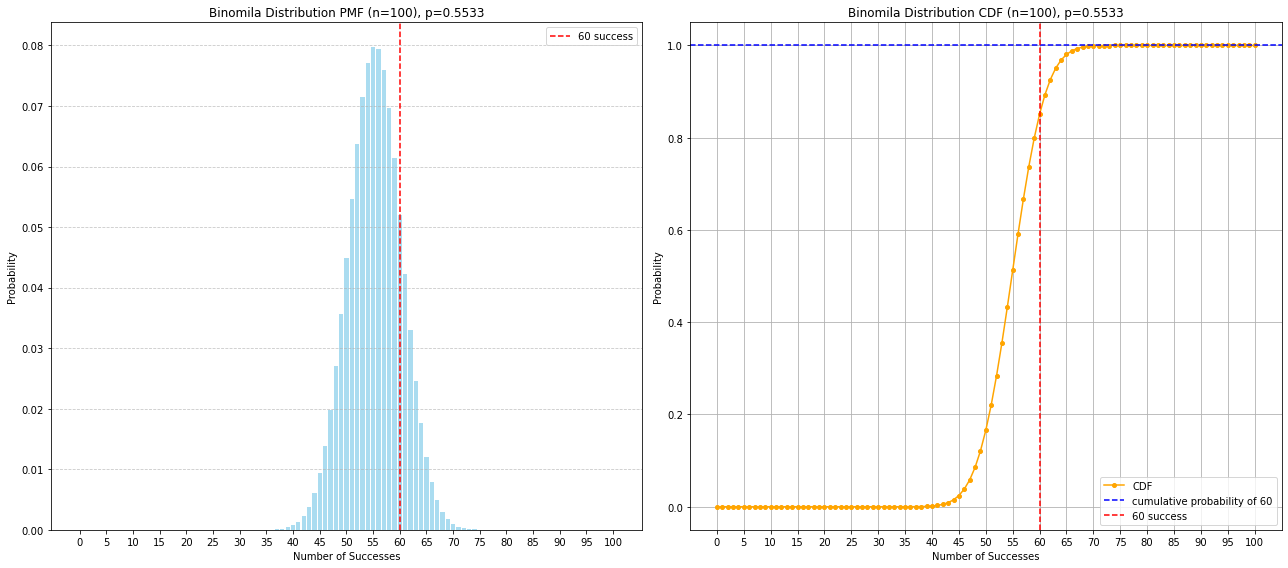

In [25]:
tips_df=pd.read_csv(r'.\Datasets\tips.csv')

# Binary outcome : success if (tip/ total _bill) > 0.15 otherwise failure

def classify_tips(row):
    total_bill = row['total_bill']
    tip= row['tip']
    if (tip/  total_bill) > 0.15:
        return 1 # success
    else:
        return 0 # Failure
    
#Apply the funtion to create the binary column
tips_df['tip_binary']= tips_df.apply(classify_tips,axis=1)


# total number of trials 
n=len(tips_df)

#Number of successes 
k=tips_df['tip_binary'].sum()

#Probability of success
p=k/n
# define number of trials for the binomial distribution
trial=100

#  Generate x values (number of successsess from 0 to 100)
x = np.arange(0,trial + 1 )

# calculate the PMF for each numner of successes
pmf_values=binom.pmf(x,trial,p)
cumulative_probability=0

for i in x:
    cumulative_probability=binom.cdf(i,trial,p)
    # print(f"Probability for {i}  successes ={pmf_values[i]:.6f} cumulative_probability={cumulative_probability:.6f}")

cdf_values=binom.cdf(x,trial,p)

min_desired_successes=int(0.6*trial)

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.bar(x,pmf_values,color='skyblue',alpha=0.7)
plt.title(f"Binomila Distribution PMF (n={trial}), p={p:.4f}")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.xticks(np.arange(0,trial+1,5))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.axvline(x=min_desired_successes,color='red',linestyle='--',label='60 success')
plt.legend()

#CDF plot
plt.subplot(1,2,2)
plt.plot(x,cdf_values,marker='o',color='orange',label='CDF',markersize=4)
plt.title(f"Binomila Distribution CDF (n={trial}), p={p:.4f}")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.xticks(np.arange(0,trial+1,5))
plt.grid()
plt.axhline(y=cumulative_probability,color='blue',linestyle='--',label='cumulative probability of 60')
plt.axvline(x=min_desired_successes,color='red',linestyle='--',label='60 success')
plt.legend()

plt.tight_layout()
plt.show()

 overall probablity of survival :0.3838


ValueError: x and y must have same first dimension, but have shapes (151,) and (101,)

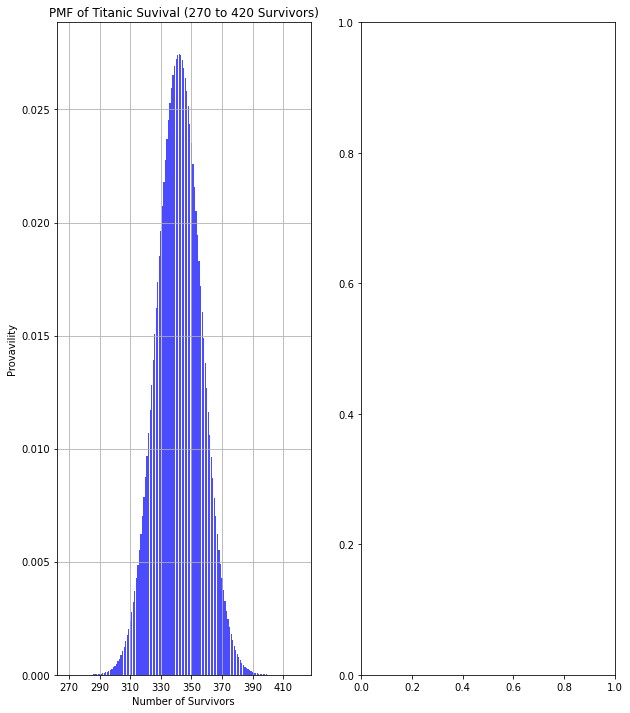

In [35]:
titanic_df=pd.read_csv(r'.\Datasets\titanic.csv')

# Define success: 1 if survived othervise 0
def classify_survival(row):
    if row['survived'] ==1:
        return 1 
    else:
        return 0

# Apply function to create the binary column
titanic_df['survival_binary']=titanic_df.apply(classify_survival,axis=1)

# Total number of trials total distribution
n=len(titanic_df)

# Number of sucesses survivers
k = titanic_df['survival_binary'].sum()

# probavlitues of successs
p = k/n
print(f" overall probablity of survival :{p:.4f}")

# define mumber of trials for the binomila distribution
trials = n

# Genereate x values (number if successes )
x=np.arange(270,420 +1)

# calculate the PMF for each number of sucess
pmf_values = binom.pmf(x,trials,p)

# calculate the csf for each number of sucessess
sdf_values=binom.cdf(x,trials,p)

# create a figure and subplot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,12))


# plotting the PMF in the first subplot
ax1.bar(x,pmf_values,color='blue',alpha=0.7)
ax1.set_title('PMF of Titanic Suvival (270 to 420 Survivors)')
ax1.set_xlabel('Number of Survivors')
ax1.set_ylabel('Provavility')
# ax1.set_xlim(270,420,20)  # set x axis limits between 270 and 420
ax1.set_xticks(np.arange(270,421,step=20))
ax1.grid()

# plotting the CDF in the first subplot
ax2.plot(x, cdf_values, color='green', alpha=0.7, marker='o', linestyle='-', label='CDF')
ax2.set_title('CDF of Titanic Suvival (270 to 420 Survivors)')
ax2.set_xlabel('Number of Survivors')
ax2.set_ylabel('Provavility')
# ax2.set_xlim(270,420)  # set x axis limits between 270 and 420
ax2.set_xticks(np.arange(270,421,step=20))
ax2.grid()